### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[0.91971822, 0.89577478, 1.06614034, ..., 0.97515903, 1.08878397,
        0.90657966],
       [1.08265563, 0.96987341, 0.87921941, ..., 1.00504081, 1.0653014 ,
        0.97673175],
       [1.00554697, 1.10099836, 1.0233394 , ..., 0.88556579, 1.11055796,
        1.03753113],
       ...,
       [1.10869928, 0.95194967, 0.9225633 , ..., 0.71231198, 1.01297589,
        1.02470426],
       [0.86142621, 0.93312435, 1.07852822, ..., 0.92256614, 0.97050012,
        0.88442648],
       [0.91076122, 1.14014206, 0.91899662, ..., 0.86658864, 0.94125026,
        0.92261423]])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [7]:
sales_target[0:10]

array([[ 75000,  75000,  75000, ...,  75000, 200000, 100000],
       [200000, 100000,  75000, ...,  75000,  75000, 300000],
       [ 75000, 100000, 300000, ..., 100000, 200000,  75000],
       ...,
       [ 75000, 100000, 200000, ..., 200000, 100000, 500000],
       [100000, 300000,  75000, ..., 300000, 100000, 100000],
       [100000, 100000, 100000, ..., 100000, 200000,  75000]])

In [8]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [9]:
commission_percentages[0:10]

array([[0.03, 0.02, 0.04, ..., 0.03, 0.04, 0.03],
       [0.04, 0.03, 0.02, ..., 0.04, 0.04, 0.03],
       [0.04, 0.04, 0.04, ..., 0.02, 0.04, 0.04],
       ...,
       [0.04, 0.03, 0.03, ..., 0.02, 0.04, 0.04],
       [0.02, 0.03, 0.04, ..., 0.03, 0.03, 0.02],
       [0.03, 0.04, 0.03, ..., 0.02, 0.03, 0.03]])

In [10]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [11]:
total_commissions.std()

96369.92136040733

In [12]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2946250.0
1,2666000.0
2,2957750.0
3,2779750.0
4,2769750.0


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

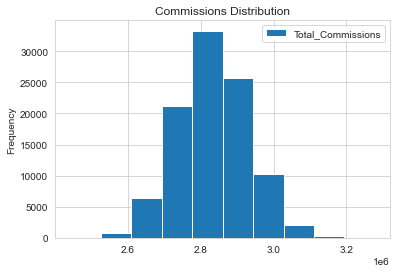

In [13]:
df.plot(kind='hist', title='Commissions Distribution')

In [14]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.832278e+06
std,9.637040e+04
min,2.442500e+06
25%,2.766500e+06
50%,2.831250e+06
75%,2.896750e+06
max,3.278250e+06
